In [1]:
#import relevant packages 
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA

In [2]:
#import data 
df = pd.read_csv('train.csv')

In [3]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
df.shape

(1460, 81)

In [5]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))


,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [8]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [9]:
# Exploring rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
html_rows_with_missing_values = create_scrollable_table(rows_with_missing_values.head(), 'rows_with_missing_values', 'Rows with missing values')

display(HTML(html_rows_with_missing_values))


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<ipython-input-11-f1e769030cec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


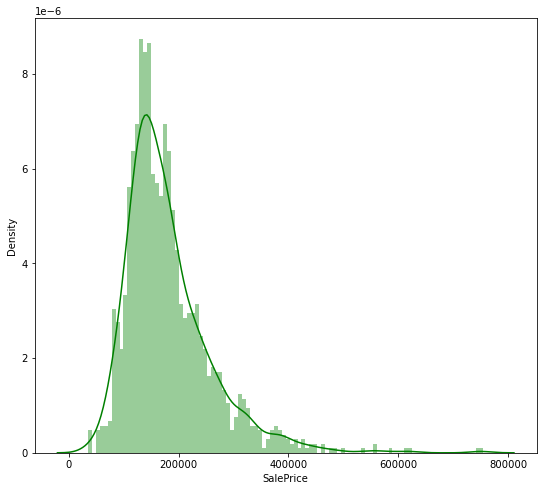

In [11]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

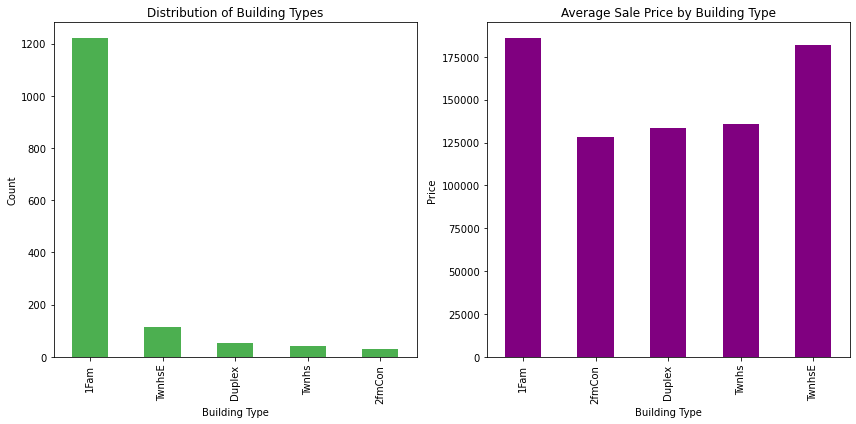

In [12]:
# 1. Distribution of dwelling types and their relation to sale prices
dwelling_types = df['BldgType'].value_counts()
dwelling_prices = df.groupby('BldgType')['SalePrice'].mean()

# Create bar charts
plt.figure(figsize=(12, 6))

# Bar chart for distribution of building types
plt.subplot(1, 2, 1)
dwelling_types.plot(kind='bar', color='#4CAF50')  # Use hexadecimal color
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')

# Bar chart for average sale price by building type
plt.subplot(1, 2, 2)
dwelling_prices.plot(kind='bar', color='purple')  # Use named color
plt.title('Average Sale Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Price')

# Show the plots
plt.tight_layout()
plt.show()

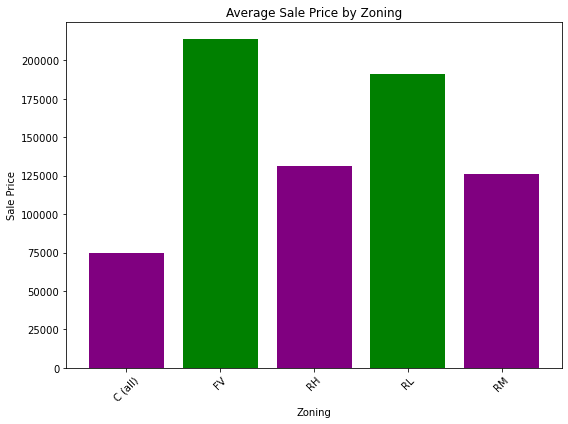

In [13]:
# 2. Zoning impact on sale price
zoning_prices = df.groupby('MSZoning')['SalePrice'].mean()
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(zoning_prices.index, zoning_prices.values, color=['purple', 'green'])
plt.title('Average Sale Price by Zoning')
plt.xlabel('Zoning')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

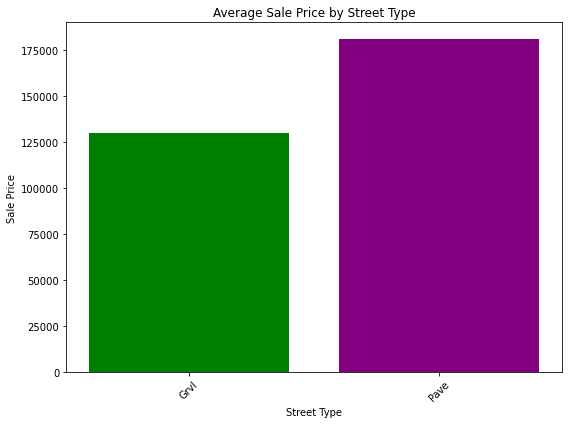

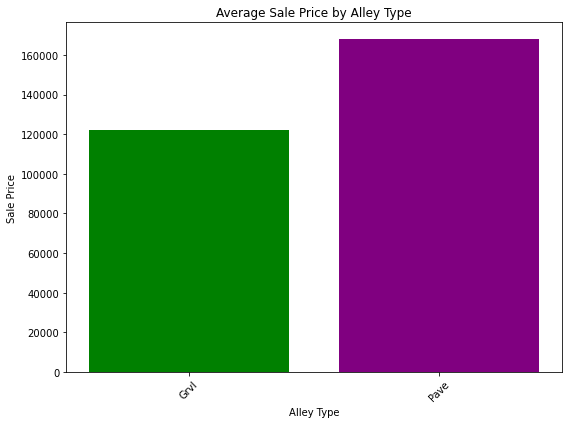

In [14]:
# 3. Street and alley access types effect on sale price
street_prices = df.groupby('Street')['SalePrice'].mean()
alley_prices = df.groupby('Alley')['SalePrice'].mean()

# Create bar chart for street prices
plt.figure(figsize=(8, 6))
colors_street = np.where(street_prices.index == 'Pave', 'purple', 'green')
plt.bar(street_prices.index, street_prices.values, color=colors_street)
plt.title('Average Sale Price by Street Type')
plt.xlabel('Street Type')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot for street prices
plt.show()

# Alley Prices
alley_prices = df.groupby('Alley')['SalePrice'].mean()

# Create bar chart for alley prices
plt.figure(figsize=(8, 6))
colors_alley = np.where(alley_prices.index == 'Pave', 'purple', 'green')
plt.bar(alley_prices.index, alley_prices.values, color=colors_alley)
plt.title('Average Sale Price by Alley Type')
plt.xlabel('Alley Type')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot for alley prices
plt.show()

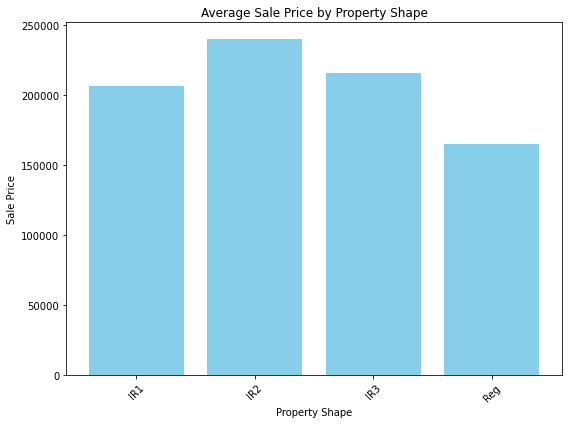

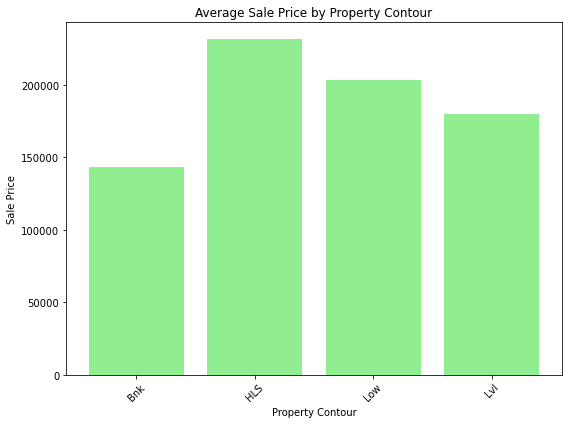

In [15]:
# 4. Average sale price by property shape
colors = px.colors.qualitative.Plotly

shape_prices = df.groupby('LotShape')['SalePrice'].mean()
contour_prices = df.groupby('LandContour')['SalePrice'].mean()
# Create bar chart for property shape prices
plt.figure(figsize=(8, 6))
plt.bar(shape_prices.index, shape_prices.values, color='skyblue')
plt.title('Average Sale Price by Property Shape')
plt.xlabel('Property Shape')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot for property shape prices
plt.show()

# Average sale price by property contour
contour_prices = df.groupby('LandContour')['SalePrice'].mean()

# Create bar chart for property contour prices
plt.figure(figsize=(8, 6))
plt.bar(contour_prices.index, contour_prices.values, color='lightgreen')
plt.title('Average Sale Price by Property Contour')
plt.xlabel('Property Contour')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot for property contour prices
plt.show()

Correlation between Property Age and Sale Price: -0.523350417546816


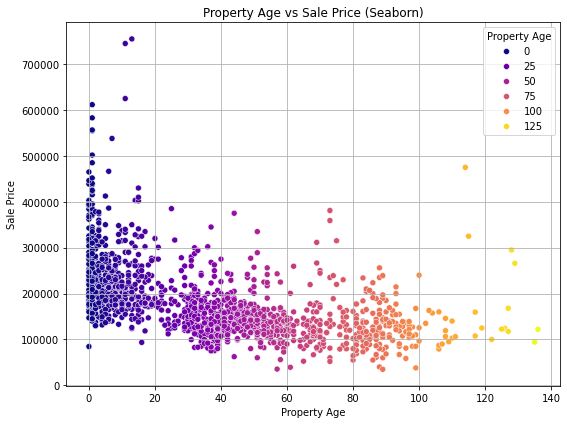

In [16]:
# 5. Calculate Property Age
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

# Calculate Correlation between Property Age and Sale Price
age_price_corr = df['PropertyAge'].corr(df['SalePrice'])
print(f'Correlation between Property Age and Sale Price: {age_price_corr}')
# Create scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PropertyAge', y='SalePrice', data=df, hue='PropertyAge', palette='plasma')
plt.title('Property Age vs Sale Price (Seaborn)')
plt.xlabel('Property Age')
plt.ylabel('Sale Price')
plt.legend(title='Property Age')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126522


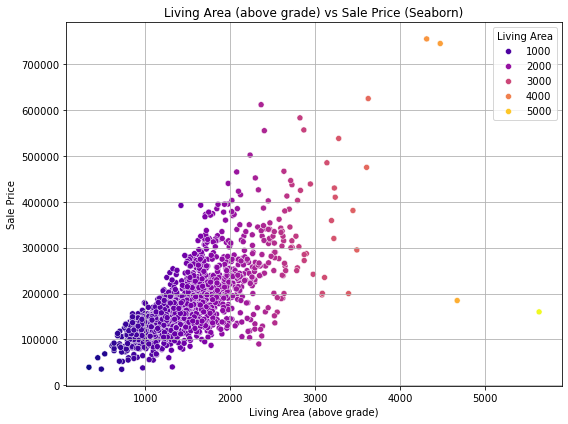

In [17]:
# 6. Calculate Correlation between Living Area and Sale Price
living_area_price_corr = df['GrLivArea'].corr(df['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')

# Create scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, hue='GrLivArea', palette='plasma')
plt.title('Living Area (above grade) vs Sale Price (Seaborn)')
plt.xlabel('Living Area (above grade)')
plt.ylabel('Sale Price')
plt.legend(title='Living Area')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-18-307ad6c7a332>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='YrSold', y='SalePrice', data=df, palette='muted')


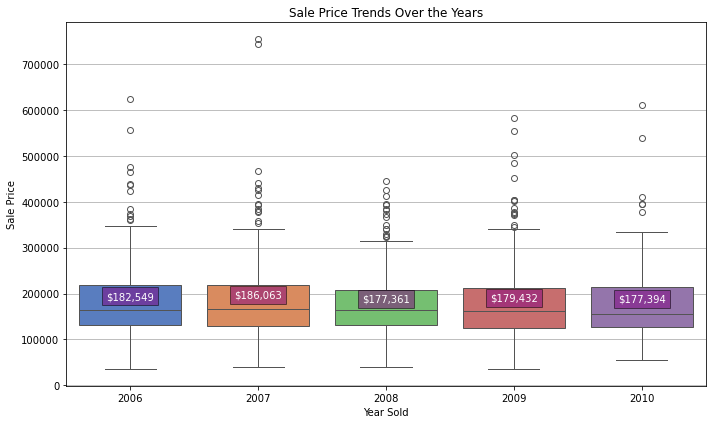

In [18]:
# 7. Box plot of price over the years
yearly_avg_sale_price = df.groupby('YrSold')['SalePrice'].mean()

# Create box plot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='YrSold', y='SalePrice', data=df, palette='muted')
plt.title('Sale Price Trends Over the Years')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')

# Overlay average sale price as text annotations
for year, avg_price in yearly_avg_sale_price.items():
    plt.text(year - 2006, avg_price + 5000, f'${avg_price:,.0f}', color='white', ha='center', fontsize=10, bbox=dict(facecolor='purple', alpha=0.5))

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [19]:
df = df.drop(columns = ['Id','MiscFeature','PoolQC','Alley','Fence'])

In [20]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['GarageCond'].fillna('None', inplace=True)

In [21]:
df.isnull().sum().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [23]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['MoSold'] = df['MoSold'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)

In [24]:
target = df['SalePrice']
df = df.drop(columns = ['SalePrice'])

In [25]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()),  
    ('pca', PCA())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipelines = {
    'Linear Regression': Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Ridge Regression': Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())]),
    'Lasso Regression': Pipeline([('preprocessor', preprocessor), ('regressor', Lasso(max_iter=10000, tol=0.001))])
}

# Define parameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
}


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Define the range of alpha values to search over
best_model = None
best_score = float('inf')

# Iterate over models and perform GridSearchCV
for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    if -grid_search.best_score_ < best_score:
        best_model = grid_search.best_estimator_
        best_score = -grid_search.best_score_

# Predict on the test set using the best model
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Calculate mean squared error and R-squared for both training and test sets
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate R-squared percentage
train_r2_percentage = train_r2 * 100
test_r2_percentage = test_r2 * 100

print("Best Model:", best_model.named_steps['regressor'].__class__.__name__)
print("Best Model Parameters:", best_model.named_steps['regressor'].get_params())
print("\nTraining Set:")
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared Score: {:.2f}%".format(train_r2_percentage))
print("\nTest Set:")
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared Score: {:.2f}%".format(test_r2_percentage))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


E:\GIS\GIS setup\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165997464295.21326, tolerance: 5374150251.745833
  model = cd_fast.sparse_enet_coordinate_descent(
E:\GIS\GIS setup\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136162112374.16728, tolerance: 5720161822.224233
  model = cd_fast.sparse_enet_coordinate_descent(
E:\GIS\GIS setup\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158815045214.9733, tolerance: 5256051888.020476
  model = cd_fast.sparse_enet_coordinate_descent(
E:\GIS\GIS setup\bin

Best Model: Lasso
Best Model Parameters: {'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.001, 'warm_start': False}

Training Set:
Root Mean Squared Error (RMSE): 22016.83131227118
R-squared Score: 91.87%

Test Set:
Root Mean Squared Error (RMSE): 28354.059283775485
R-squared Score: 89.52%


E:\GIS\GIS setup\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
E:\GIS\GIS setup\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
test_data = pd.read_csv('test.csv')

In [28]:
test_data['PropertyAge'] = test_data['YrSold'] - test_data['YearBuilt']
Id = test_data['Id']
test_data = test_data.drop(columns = ['Fence','MiscFeature','PoolQC','Alley'])
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(), inplace=True)
test_data['MasVnrType'].fillna('None', inplace=True)
test_data['MasVnrArea'].fillna(0, inplace=True)
test_data['BsmtQual'].fillna('None', inplace=True)
test_data['BsmtCond'].fillna('None', inplace=True)
test_data['BsmtExposure'].fillna('None', inplace=True)
test_data['BsmtFinType1'].fillna('None', inplace=True)
test_data['BsmtFinType2'].fillna('None', inplace=True)
test_data['FireplaceQu'].fillna('None', inplace=True)
test_data['GarageType'].fillna('None', inplace=True)
test_data['GarageYrBlt'].fillna(0, inplace=True)
test_data['GarageFinish'].fillna('None', inplace=True)
test_data['GarageQual'].fillna('None', inplace=True)
test_data['GarageCond'].fillna('None', inplace=True)
test_data['Electrical'].fillna(test_data['Electrical'].mode()[0], inplace=True)
test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0], inplace=True)
test_data['Utilities'].fillna(test_data['Utilities'].mode()[0], inplace=True)
test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0], inplace=True)
test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0], inplace=True)
test_data['BsmtFinSF1'].fillna(0, inplace=True)
test_data['BsmtFinSF2'].fillna(0, inplace=True)
test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean(), inplace=True)
test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean(), inplace=True)
test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].median(), inplace=True)
test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].median(), inplace=True)
test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0], inplace=True)
test_data['Functional'].fillna(test_data['Functional'].mode()[0], inplace=True)
test_data['GarageCars'].fillna(test_data['GarageCars'].mode()[0], inplace=True)
test_data['GarageArea'].fillna(test_data['GarageArea'].mean(), inplace=True)
test_data['SaleType'].fillna(test_data['SaleType'].mode()[0], inplace=True)
test_data['MSSubClass'] = test_data['MSSubClass'].apply(str)
test_data['MoSold'] = test_data['MoSold'].astype(str)
test_data['YrSold'] = test_data['YrSold'].astype(str)

In [29]:
pred_sales_price = best_model.predict(test_data)

In [30]:
df_result = pd.DataFrame({
    'Id': Id,
    'SalePrice': pred_sales_price
})

In [31]:
df_result

,Id,SalePrice
0,1461,116273.205092
1,1462,149384.285243
2,1463,176138.247755
3,1464,190000.207148
4,1465,214541.480339
...,...,...
1454,2915,80507.266522
1455,2916,73701.475015
1456,2917,166767.179330
1457,2918,113923.206201


In [32]:
df_result.to_csv('E:/PRODIGY INFOTECH/Task 1/submission.csv', index=False)